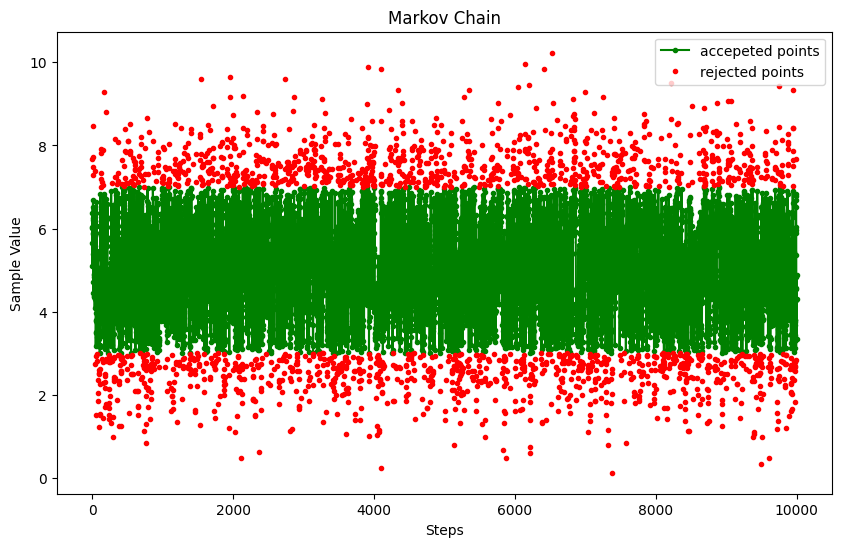

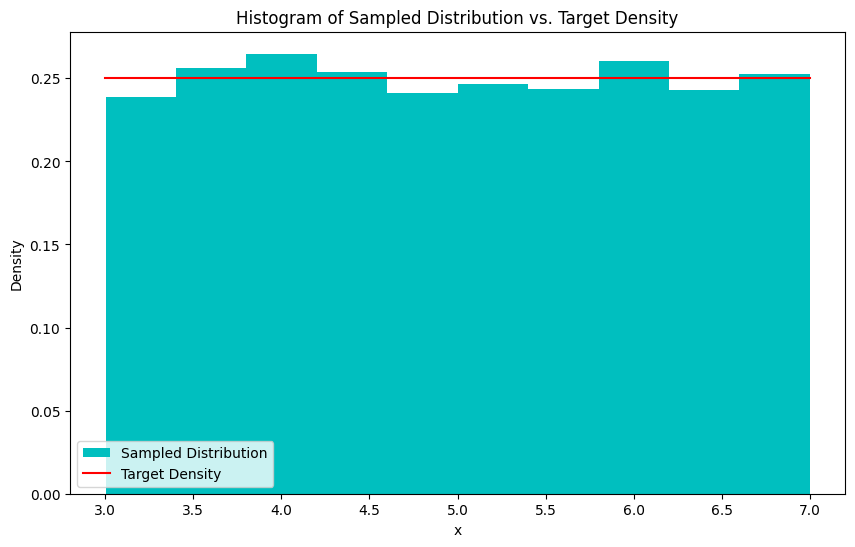

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target density function
def f(x):
    if 3 <= x <= 7:
        return 1/(7-3)  # Uniform density within the range [3, 7]
    else:
        return 0


# Define the Metropolis algorithm
def metropolis(pdf, N, start):
    samples = [start]

    accepted_points = []

    rejected_points = []

    count_acc = []    # to store indices of accepted points

    count_rej = []    # to store indices of rejected points

    for i in range(N):
        theta = samples[-1]

        theta_prime = np.random.normal(theta, 1)
        
        r = np.random.rand()

        ratio = pdf(theta_prime)/ pdf(theta)

        if  ratio > r:
            samples.append(theta_prime)

            accepted_points.append(theta_prime)
            count_acc.append(i)
        else:
            samples.append(theta)
            rejected_points.append(theta_prime)
            count_rej.append(i)

    return samples, accepted_points, count_acc, rejected_points, count_rej

start = 5.0

N = 10000

samples, accepted_points, count_acc, rejected_points, count_rej = metropolis(f, N, start)


# Plot Markov Chain
plt.figure(figsize=(10, 6))
plt.plot(count_acc, accepted_points,".-g", count_rej, rejected_points,".r")
plt.legend(["accepeted points","rejected points"])
plt.title("Markov Chain")
plt.xlabel("Steps")
plt.ylabel("Sample Value")
plt.show()

#Plot histogram of samples
plt.figure(figsize=(10, 6))
plt.hist(samples, density = True, color = 'c', label='Sampled Distribution')

x = np.linspace(3, 7, 1000)
plt.plot(x, [f(i) for i in x], color='r', label='Target Density')

plt.title("Histogram of Sampled Distribution vs. Target Density")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()        